## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.097698 -1.523873 -0.721165  0.356486  1.370013 -0.184342
1 -1.368295  0.348798 -0.773892  1.186303  0.560449  0.163846
2  0.864633  0.242849 -1.531835  1.366440  0.522526  2.151650
3  1.001460 -1.712160  1.838339 -0.310992 -0.215950 -0.595144
4 -1.320616  1.219133  1.886875  0.569879  0.867239  0.920278


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9843812	total: 67ms	remaining: 1m 6s
1:	learn: 0.9760923	total: 67.6ms	remaining: 33.7s
2:	learn: 0.9659451	total: 68.2ms	remaining: 22.7s
3:	learn: 0.9559271	total: 68.8ms	remaining: 17.1s
4:	learn: 0.9482227	total: 69.4ms	remaining: 13.8s
5:	learn: 0.9398134	total: 69.9ms	remaining: 11.6s
6:	learn: 0.9281937	total: 70.5ms	remaining: 10s
7:	learn: 0.9183530	total: 71.1ms	remaining: 8.81s
8:	learn: 0.9106683	total: 71.6ms	remaining: 7.88s
9:	learn: 0.9019011	total: 72.1ms	remaining: 7.14s
10:	learn: 0.8929378	total: 72.7ms	remaining: 6.54s
11:	learn: 0.8825246	total: 73.2ms	remaining: 6.03s
12:	learn: 0.8737534	total: 73.7ms	remaining: 5.59s
13:	learn: 0.8655692	total: 74.3ms	remaining: 5.23s
14:	learn: 0.8590300	total: 74.7ms	remaining: 4.91s
15:	learn: 0.8505119	total: 75.3ms	remaining: 4.63s
16:	learn: 0.8415251	total: 75.8ms	remaining: 4.38s
17:	learn: 0.8337152	total: 76.2ms	remaining: 4.16s
18:	learn: 0.8247089	total: 76.8ms	remaining: 3.

90:	learn: 0.4299751	total: 110ms	remaining: 1.09s
91:	learn: 0.4264399	total: 110ms	remaining: 1.09s
92:	learn: 0.4233426	total: 111ms	remaining: 1.08s
93:	learn: 0.4201926	total: 111ms	remaining: 1.07s
94:	learn: 0.4169182	total: 111ms	remaining: 1.06s
95:	learn: 0.4136550	total: 112ms	remaining: 1.05s
96:	learn: 0.4109563	total: 112ms	remaining: 1.04s
97:	learn: 0.4070603	total: 113ms	remaining: 1.04s
98:	learn: 0.4037338	total: 113ms	remaining: 1.03s
99:	learn: 0.4004667	total: 114ms	remaining: 1.02s
100:	learn: 0.3971474	total: 114ms	remaining: 1.01s
101:	learn: 0.3941165	total: 114ms	remaining: 1.01s
102:	learn: 0.3910744	total: 115ms	remaining: 1000ms
103:	learn: 0.3885925	total: 115ms	remaining: 992ms
104:	learn: 0.3850644	total: 116ms	remaining: 985ms
105:	learn: 0.3821299	total: 116ms	remaining: 978ms
106:	learn: 0.3792276	total: 116ms	remaining: 970ms
107:	learn: 0.3762705	total: 117ms	remaining: 964ms
108:	learn: 0.3729875	total: 117ms	remaining: 958ms
109:	learn: 0.3700729

258:	learn: 0.1295250	total: 188ms	remaining: 537ms
259:	learn: 0.1286234	total: 188ms	remaining: 536ms
260:	learn: 0.1277907	total: 189ms	remaining: 535ms
261:	learn: 0.1269204	total: 189ms	remaining: 534ms
262:	learn: 0.1260722	total: 190ms	remaining: 532ms
263:	learn: 0.1252454	total: 190ms	remaining: 531ms
264:	learn: 0.1243733	total: 191ms	remaining: 529ms
265:	learn: 0.1236643	total: 191ms	remaining: 527ms
266:	learn: 0.1229090	total: 192ms	remaining: 526ms
267:	learn: 0.1220494	total: 192ms	remaining: 525ms
268:	learn: 0.1212049	total: 193ms	remaining: 523ms
269:	learn: 0.1204224	total: 193ms	remaining: 522ms
270:	learn: 0.1196893	total: 194ms	remaining: 521ms
271:	learn: 0.1190113	total: 194ms	remaining: 519ms
272:	learn: 0.1181466	total: 195ms	remaining: 518ms
273:	learn: 0.1170874	total: 195ms	remaining: 517ms
274:	learn: 0.1162124	total: 195ms	remaining: 515ms
275:	learn: 0.1154851	total: 196ms	remaining: 514ms
276:	learn: 0.1147993	total: 196ms	remaining: 512ms
277:	learn: 

476:	learn: 0.0377701	total: 293ms	remaining: 321ms
477:	learn: 0.0375173	total: 294ms	remaining: 321ms
478:	learn: 0.0373222	total: 294ms	remaining: 320ms
479:	learn: 0.0371050	total: 295ms	remaining: 319ms
480:	learn: 0.0369971	total: 295ms	remaining: 318ms
481:	learn: 0.0367864	total: 295ms	remaining: 317ms
482:	learn: 0.0366042	total: 296ms	remaining: 317ms
483:	learn: 0.0363974	total: 296ms	remaining: 316ms
484:	learn: 0.0361580	total: 297ms	remaining: 315ms
485:	learn: 0.0359241	total: 297ms	remaining: 314ms
486:	learn: 0.0356957	total: 298ms	remaining: 314ms
487:	learn: 0.0354654	total: 298ms	remaining: 313ms
488:	learn: 0.0352445	total: 299ms	remaining: 312ms
489:	learn: 0.0350495	total: 299ms	remaining: 311ms
490:	learn: 0.0348931	total: 300ms	remaining: 310ms
491:	learn: 0.0346501	total: 300ms	remaining: 310ms
492:	learn: 0.0344134	total: 300ms	remaining: 309ms
493:	learn: 0.0342304	total: 301ms	remaining: 308ms
494:	learn: 0.0340501	total: 301ms	remaining: 307ms
495:	learn: 

643:	learn: 0.0188209	total: 371ms	remaining: 205ms
644:	learn: 0.0187581	total: 372ms	remaining: 205ms
645:	learn: 0.0186778	total: 372ms	remaining: 204ms
646:	learn: 0.0185907	total: 373ms	remaining: 203ms
647:	learn: 0.0185151	total: 373ms	remaining: 203ms
648:	learn: 0.0184469	total: 373ms	remaining: 202ms
649:	learn: 0.0184042	total: 374ms	remaining: 201ms
650:	learn: 0.0183534	total: 374ms	remaining: 201ms
651:	learn: 0.0183115	total: 375ms	remaining: 200ms
652:	learn: 0.0182340	total: 375ms	remaining: 199ms
653:	learn: 0.0181612	total: 375ms	remaining: 199ms
654:	learn: 0.0180832	total: 376ms	remaining: 198ms
655:	learn: 0.0180423	total: 376ms	remaining: 197ms
656:	learn: 0.0179933	total: 377ms	remaining: 197ms
657:	learn: 0.0179182	total: 377ms	remaining: 196ms
658:	learn: 0.0178162	total: 378ms	remaining: 195ms
659:	learn: 0.0177428	total: 378ms	remaining: 195ms
660:	learn: 0.0176655	total: 379ms	remaining: 194ms
661:	learn: 0.0175665	total: 379ms	remaining: 194ms
662:	learn: 

877:	learn: 0.0088665	total: 476ms	remaining: 66.2ms
878:	learn: 0.0088564	total: 477ms	remaining: 65.7ms
879:	learn: 0.0088444	total: 477ms	remaining: 65.1ms
880:	learn: 0.0088333	total: 478ms	remaining: 64.5ms
881:	learn: 0.0088210	total: 478ms	remaining: 64ms
882:	learn: 0.0088088	total: 479ms	remaining: 63.4ms
883:	learn: 0.0087969	total: 479ms	remaining: 62.9ms
884:	learn: 0.0087628	total: 480ms	remaining: 62.3ms
885:	learn: 0.0087511	total: 480ms	remaining: 61.8ms
886:	learn: 0.0087395	total: 481ms	remaining: 61.2ms
887:	learn: 0.0087095	total: 481ms	remaining: 60.7ms
888:	learn: 0.0086676	total: 482ms	remaining: 60.1ms
889:	learn: 0.0086512	total: 482ms	remaining: 59.6ms
890:	learn: 0.0086246	total: 483ms	remaining: 59ms
891:	learn: 0.0085983	total: 483ms	remaining: 58.5ms
892:	learn: 0.0085827	total: 484ms	remaining: 58ms
893:	learn: 0.0085567	total: 484ms	remaining: 57.4ms
894:	learn: 0.0085453	total: 485ms	remaining: 56.8ms
895:	learn: 0.0084978	total: 485ms	remaining: 56.3ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

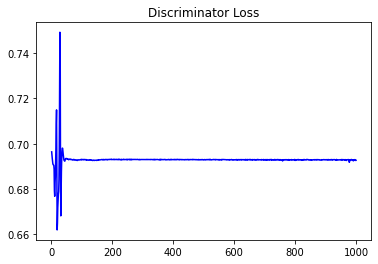

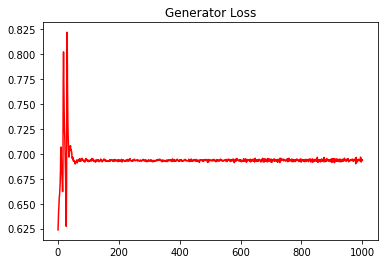

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.03991186394528442


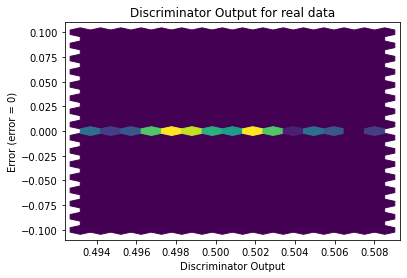

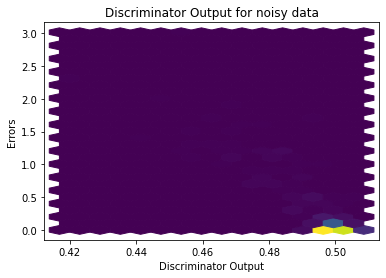

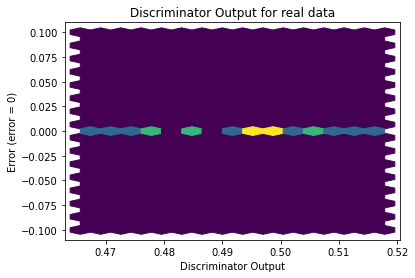

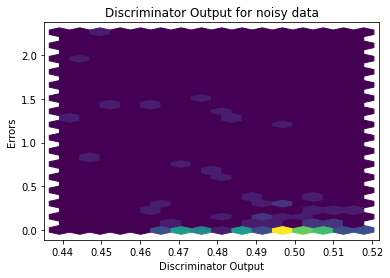

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


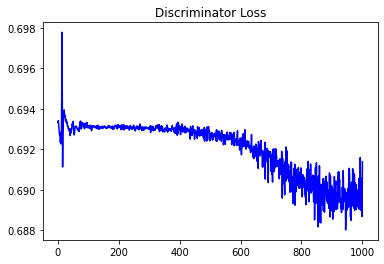

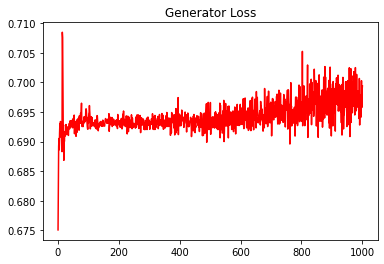

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05478047253986355


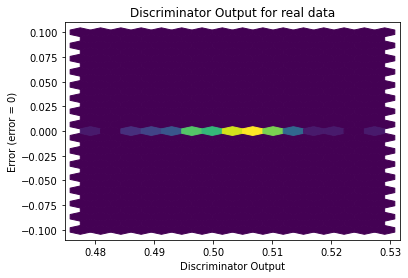

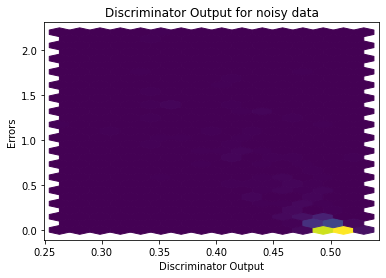

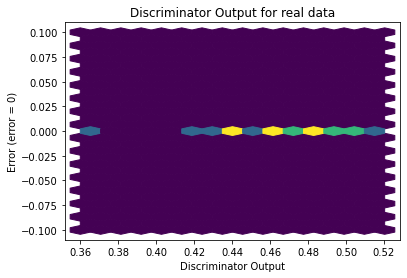

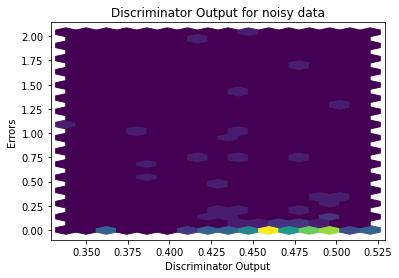

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0893]], requires_grad=True)
